In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/campanha_bloco_de_codigo.xlsx')

In [ ]:
df.head(5)

,Article URL,Nome do artigo,Categoria,Campanha,Data,Visitas Diretas,Novos usuários únicos,Clicks pagos,Tempo de leitura (minutos),Clicks redes sociais,Vezes pesquisados,Visualizações
0,Article_1,Recomendações de experiência do usuário,UX,1047,2021-06-01,72.8,116.48,0.0,1119.756655,189.28,32.76,444
1,Article_1,Recomendações de experiência do usuário,UX,1047,2021-06-02,103.2,165.12,0.0,1649.391860,268.32,46.44,587
2,Article_1,Recomendações de experiência do usuário,UX,1047,2021-06-03,582.4,931.84,0.0,9220.126959,1514.24,262.08,2968
3,Article_1,Recomendações de experiência do usuário,UX,1047,2021-06-04,255.2,408.32,0.0,4545.397905,663.52,114.84,1368
4,Article_1,Recomendações de experiência do usuário,UX,1047,2021-06-05,665.0,1064.00,0.0,6479.392214,1729.00,299.25,3369


In [ ]:
df.columns

Index(['Article URL', 'Nome do artigo', 'Categoria', 'Campanha', 'Data',
       'Visitas Diretas', 'Novos usuários únicos', 'Clicks pagos',
       'Tempo de leitura (minutos)', 'Clicks redes sociais',
       'Vezes pesquisados', 'Visualizações'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14104 entries, 0 to 14103
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Article URL                 14104 non-null  object        
 1   Nome do artigo              14104 non-null  object        
 2   Categoria                   14104 non-null  object        
 3   Campanha                    14104 non-null  int64         
 4   Data                        14104 non-null  datetime64[ns]
 5   Visitas Diretas             14104 non-null  float64       
 6   Novos usuários únicos       14104 non-null  float64       
 7   Clicks pagos                14104 non-null  float64       
 8   Tempo de leitura (minutos)  14104 non-null  float64       
 9   Clicks redes sociais        14104 non-null  float64       
 10  Vezes pesquisados           14104 non-null  float64       
 11  Visualizações               14104 non-null  int64     

In [ ]:
df_correlacionaveis = df.iloc[:, 4:11]
df_correlacionaveis.corr()

,Data,Visitas Diretas,Novos usuários únicos,Clicks pagos,Tempo de leitura (minutos),Clicks redes sociais,Vezes pesquisados
Data,1.000000,-0.053005,-0.053005,-0.030852,-0.058644,-0.053005,-0.053005
Visitas Diretas,-0.053005,1.000000,1.000000,0.150263,0.943543,1.000000,1.000000
Novos usuários únicos,-0.053005,1.000000,1.000000,0.150263,0.943543,1.000000,1.000000
Clicks pagos,-0.030852,0.150263,0.150263,1.000000,0.150871,0.150263,0.150263
Tempo de leitura (minutos),-0.058644,0.943543,0.943543,0.150871,1.000000,0.943543,0.943543
Clicks redes sociais,-0.053005,1.000000,1.000000,0.150263,0.943543,1.000000,1.000000
Vezes pesquisados,-0.053005,1.000000,1.000000,0.150263,0.943543,1.000000,1.000000


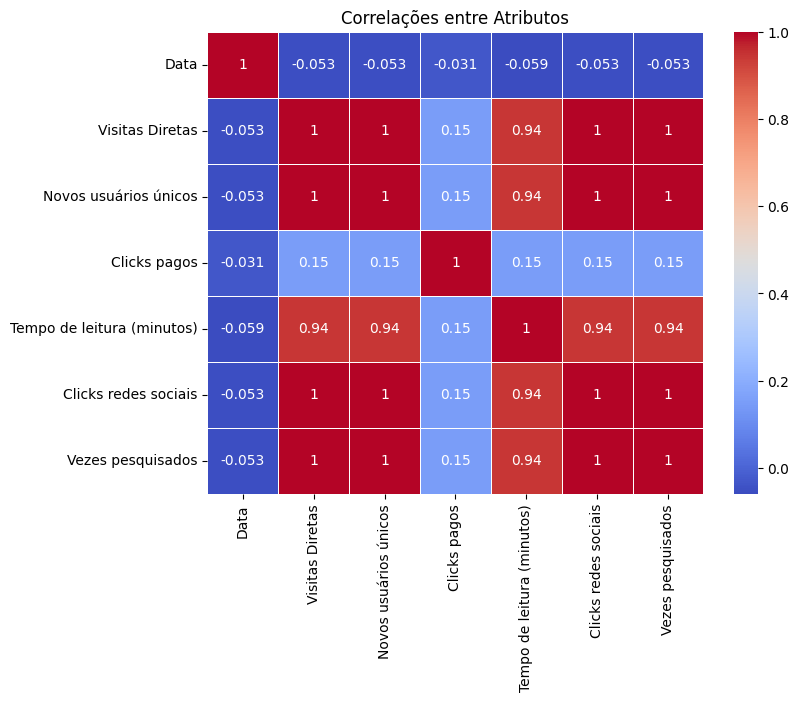

In [ ]:
matriz_correlacao = df_correlacionaveis.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlações entre Atributos')
plt.show()

In [ ]:
import statsmodels.api as sm

# Definindo as variáveis independentes (X) e a variável dependente (y)
X = df[['Visitas Diretas', 'Novos usuários únicos', 'Clicks redes sociais']]
y = df['Tempo de leitura (minutos)']

# Adicionando uma constante ao modelo (intercepto)
X = sm.add_constant(X)

# Ajustando o modelo de regressão linear múltipla
model = sm.OLS(y, X).fit()

# Imprimindo os resultados
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Tempo de leitura (minutos)   R-squared:                       0.890
Model:                                    OLS   Adj. R-squared:                  0.890
Method:                         Least Squares   F-statistic:                 5.719e+04
Date:                        Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                                11:47:51   Log-Likelihood:            -1.6048e+05
No. Observations:                       14104   AIC:                         3.210e+05
Df Residuals:                           14101   BIC:                         3.210e+05
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
df.groupby('Article URL').count()

,Nome do artigo,Categoria,Campanha,Data,Visitas Diretas,Novos usuários únicos,Clicks pagos,Tempo de leitura (minutos),Clicks redes sociais,Vezes pesquisados,Visualizações
Article URL,,,,,,,,,,,
Article_1,183,183,183,183,183,183,183,183,183,183,183
Article_10,89,89,89,89,89,89,89,89,89,89,89
Article_100,84,84,84,84,84,84,84,84,84,84,84
Article_101,63,63,63,63,63,63,63,63,63,63,63
Article_102,75,75,75,75,75,75,75,75,75,75,75
...,...,...,...,...,...,...,...,...,...,...,...
Article_95,58,58,58,58,58,58,58,58,58,58,58
Article_96,66,66,66,66,66,66,66,66,66,66,66
Article_97,80,80,80,80,80,80,80,80,80,80,80


In [ ]:
porcentagem_cliques_pagos = (df['Clicks pagos'].sum() / df['Visualizações'].sum()) * 100
porcentagem_cliques_pagos

0.7970212745479422

In [ ]:
porcentagem_cliques_redes_sociais = (df['Clicks redes sociais'].sum()/ df['Visualizações'].sum()) * 100
porcentagem_cliques_redes_sociais

51.03123871287003

In [ ]:
porcentagem_pesquisas = (df['Vezes pesquisados'].sum() / df['Visualizações'].sum()) * 100
porcentagem_pesquisas

8.832329777227505

In [ ]:
porcentagem_visitas = (df['Visitas Diretas'].sum() / df['Visualizações'].sum())
porcentagem_visitas

0.19627399504950013

In [ ]:
ctr = ((df['Clicks redes sociais'].sum() + df['Clicks pagos'].sum()) / df['Visualizações'].sum()) * 100
ctr

51.82825998741798

In [ ]:
df_vc = df.groupby('Categoria')['Visualizações'].sum()
df_vc.sort_values(ascending=False)

Categoria
Gestão          16287302
Data Science     9155203
Tecnologia       7370702
Negócios         2135005
UX               1491626
DevOps            965373
Programação       494231
Marketing         127829
Name: Visualizações, dtype: int64

In [59]:
# VERIFICAÇÃO DO ARTIGO POPULAR PELO QUE POSSUI VALOR MÁXIMO NAS FEATURES DE ANÁLISE

#adição de df com ctr por artigo
df_com_ctr = df.copy()
df_com_ctr['ctr'] = (df_com_ctr['Clicks pagos'] + df_com_ctr['Clicks redes sociais']) / (df_com_ctr['Visualizações'].sum()) * 100

condicao_artigo_mais_lido = df['Visualizações'] == df['Visualizações'].max()
condicao_maior_tempo_de_leitura = df['Tempo de leitura (minutos)'] == df['Tempo de leitura (minutos)'].max()
condicao_mais_pesquisado = df['Vezes pesquisados'] == df['Vezes pesquisados'].max()
condicao_maior_ctr = df_com_ctr['ctr'] == df_com_ctr['ctr'].max()

mais_lido = df.loc[condicao_artigo_mais_lido]
mais_tempo_lido = df.loc[condicao_maior_tempo_de_leitura]
mais_pesquisado = df.loc[condicao_mais_pesquisado]
maior_ctr = df_com_ctr.loc[condicao_maior_ctr]

condicoes_combinadas = condicao_artigo_mais_lido & condicao_maior_tempo_de_leitura & condicao_mais_pesquisado & condicao_maior_ctr

#localizar o registro que satisfaz todas as condições
mais_popular = df_com_ctr.loc[condicoes_combinadas]

mais_popular

,Article URL,Nome do artigo,Categoria,Campanha,Data,Visitas Diretas,Novos usuários únicos,Clicks pagos,Tempo de leitura (minutos),Clicks redes sociais,Vezes pesquisados,Visualizações,ctr
8698,Article_46,Escuta ativa e como isso mudará sua abordagem,Gestão,1047,2021-07-21,342016.0,547225.6,0.0,3.245274e+06,889241.6,153907.2,1710122,2.338431


Nome do artigo
Escuta ativa e como isso mudará sua abordagem                   3.678954
Conteúdo e marketing além do consumo em massa                   2.590245
Melhores práticas para gerenciamento de projetos                2.456083
Conselho Executivo Parte 2: CFO                                 2.399740
Observabilidade da ciência de dados para executivos             1.978357
                                                                  ...   
Onde, quando e como enviar sua escrita                          0.000053
3 dicas para pesquisa de UX bem -sucedida                       0.000038
Como usar o feedback para acelerar o crescimento da carreira    0.000033
Escolhendo os parceiros de tecnologia certos                    0.000023
Principais habilidades da força de trabalho                     0.000000
Name: ctr, Length: 168, dtype: float64